In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [99]:
data=pd.read_csv('omp.csv')

In [100]:
data['try']=np.floor(data.index/ 64).astype(int)

In [101]:
data['runtime']

0      42.151087
1      22.257068
2      14.802308
3      11.075760
4       9.014742
         ...    
315     0.993314
316     1.051895
317     1.021369
318     0.967668
319     0.954969
Name: runtime, Length: 320, dtype: float64

In [102]:
par=data.groupby('try').apply(lambda x: (x['runtime'].iloc[0]/x['runtime']))

In [103]:
par=par.reset_index()
data=data.merge(par, left_index=True, right_on="level_1")

In [104]:
data.drop(["try_x", "try_y", "level_1"], axis=1,inplace=True)


In [105]:
data.rename(columns={'runtime_x':'runtime', 'runtime_y': 'speedup'}, inplace=True)

In [115]:
means=data.groupby('threads').apply(lambda x: x['speedup'].mean())

In [116]:
std_devs=data.groupby('threads').apply(lambda x: x['speedup'].std())

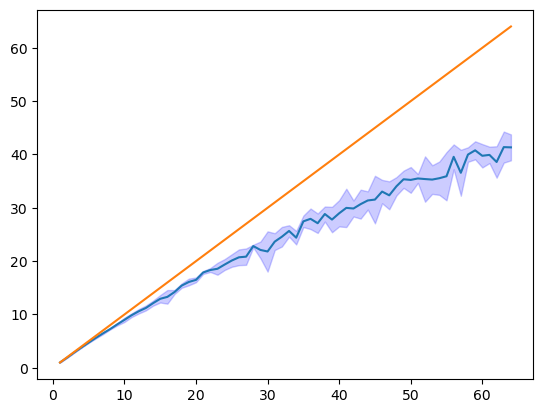

In [119]:
plt.plot(res.index, means)
plt.plot(res.index, res.index)
plt.fill_between(res.index, means - std_devs, means + std_devs, alpha=0.2, color='blue', label='Standard Deviation')

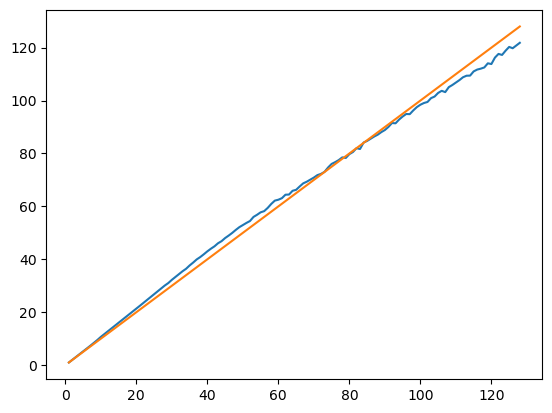

In [6]:
plt.plot(sockets, serial/time)
plt.plot(sockets, sockets)